# INDIA - ZIMBABWE Prediction

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
from sklearn.mixture import GaussianMixture
from pylab import concatenate, normal

import warnings
warnings.filterwarnings('ignore')

In [2]:
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"

In [3]:
df = pd.read_csv(url, error_bad_lines=False)
df_copy = pd.read_csv(url, error_bad_lines=False)

In [4]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

# Cleaning Data

In [5]:
num = df._get_numeric_data()
num[num < 0] = 0

df['date'] = df_copy['date']

In [6]:
df['date'] = pd.to_datetime(df['date'])

In [7]:
df_india = df.loc[df["location"] == 'India']

df_india.reset_index(inplace=True, drop=True)
df_india["date_numbered"] = df_india.index

In [8]:
df_india_backup = df_india

In [9]:
df_india_1 = df_india.loc[df_india["date_numbered"] <= 385]
df_india_2 = df_india.loc[df_india["date_numbered"] > 385]
df_india_2 = df_india_2.loc[df_india_2["date_numbered"] <= 550]
df_india_3 = df_india.loc[df_india["date_numbered"] > 680]

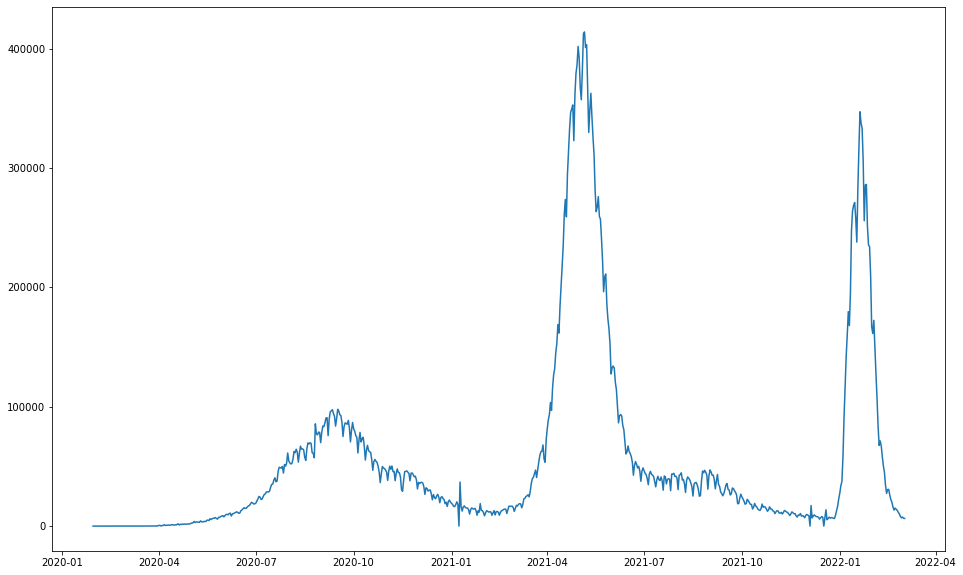

In [10]:
fig1 = plt.figure(figsize = (16,10))
plt.plot(df_india['date'], df_india['new_cases'])

### Possible Matches - Israel, Russia, South Africa, Spain, Zambia, Zimbabwe

In [11]:
df_us = df.loc[df["location"] == "United States"]
df_us.reset_index(inplace=True, drop=True)
df_us["date_numbered"] = df_us.index

df_uk = df.loc[df["location"] == "United Kingdom"]
df_uk.reset_index(inplace=True, drop=True)
df_uk["date_numbered"] = df_uk.index

df_germany = df.loc[df["location"] == "Germany"]
df_germany.reset_index(inplace=True, drop=True)
df_germany["date_numbered"] = df_germany.index

df_france = df.loc[df["location"] == "France"]
df_france.reset_index(inplace=True, drop=True)
df_france["date_numbered"] = df_france.index

df_sa = df.loc[df["location"] == "South Africa"]
df_sa.reset_index(inplace=True, drop=True)
df_sa["date_numbered"] = df_sa.index

df_israel = df.loc[df["location"] == "Israel"]
df_israel.reset_index(inplace=True, drop=True)
df_israel["date_numbered"] = df_israel.index

df_russia = df.loc[df["location"] == "Russia"]
df_russia.reset_index(inplace=True, drop=True)
df_russia["date_numbered"] = df_russia.index

df_spain = df.loc[df["location"] == "Spain"]
df_spain.reset_index(inplace=True, drop=True)
df_spain["date_numbered"] = df_spain.index

df_zambia = df.loc[df["location"] == "Zambia"]
df_zambia.reset_index(inplace=True, drop=True)
df_zambia["date_numbered"] = df_zambia.index

df_zimbabwe = df.loc[df["location"] == "Zimbabwe"]
df_zimbabwe.reset_index(inplace=True, drop=True)
df_zimbabwe["date_numbered"] = df_zimbabwe.index

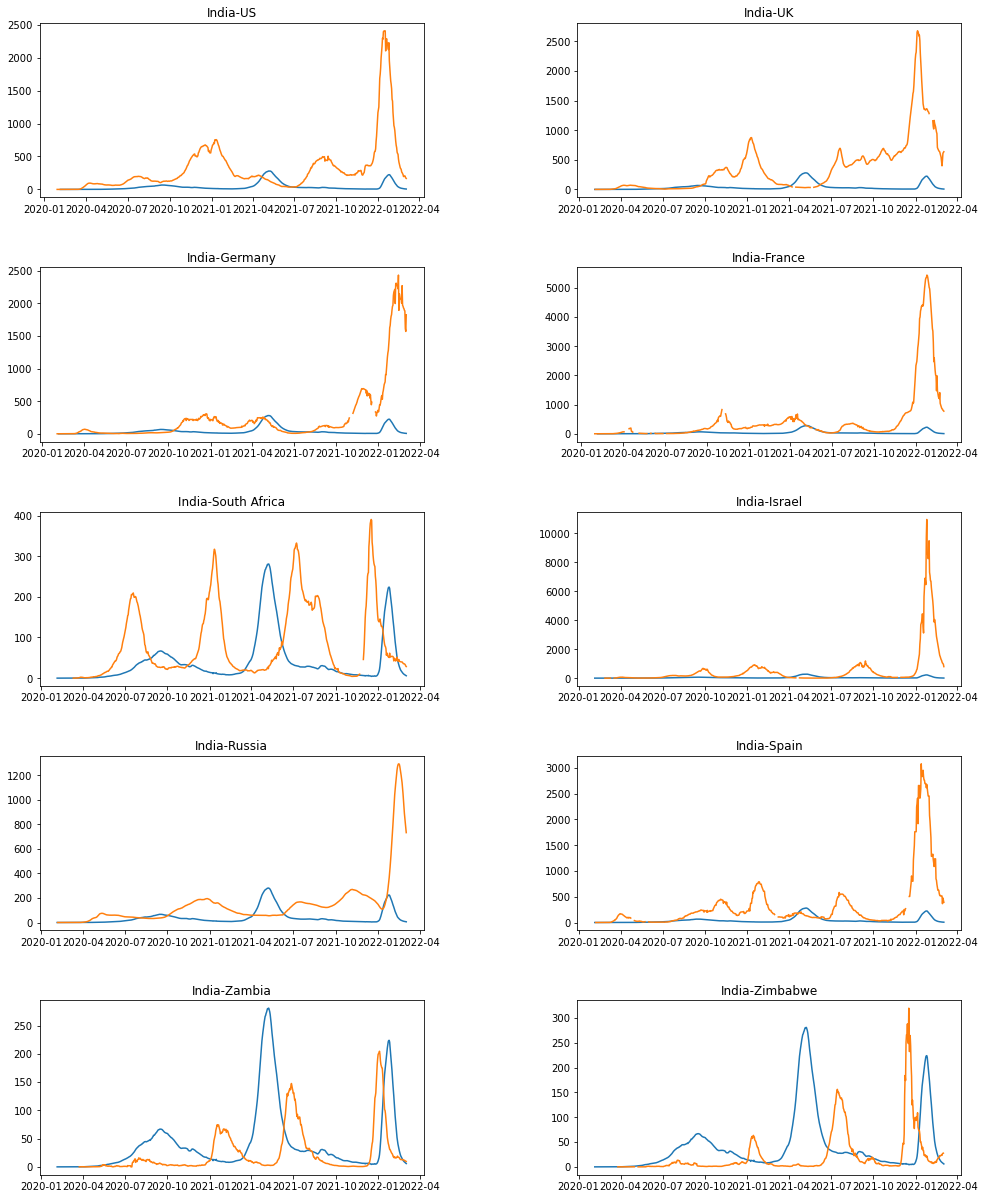

In [12]:
plt.figure(figsize=(16, 20)) 

plt.subplot(5,2,1)
plt.title("India-US")
plt.plot(df_india['date'],df_india['new_cases_smoothed_per_million'])
plt.plot(df_us['date'],df_us['new_cases_smoothed_per_million'])

plt.subplot(5,2,2)
plt.title("India-UK")
plt.plot(df_india['date'],df_india['new_cases_smoothed_per_million'])
plt.plot(df_uk['date'],df_uk['new_cases_smoothed_per_million'])

plt.subplot(5,2,3)
plt.title("India-Germany")
plt.plot(df_india['date'],df_india['new_cases_smoothed_per_million'])
plt.plot(df_germany['date'],df_germany['new_cases_smoothed_per_million'])

plt.subplot(5,2,4)
plt.title("India-France")
plt.plot(df_india['date'],df_india['new_cases_smoothed_per_million'])
plt.plot(df_france['date'],df_france['new_cases_smoothed_per_million'])

plt.subplot(5,2,5)
plt.title("India-South Africa")
plt.plot(df_india['date'],df_india['new_cases_smoothed_per_million'])
plt.plot(df_sa['date'],df_sa['new_cases_smoothed_per_million'])

plt.subplot(5,2,6)
plt.title("India-Israel")
plt.plot(df_india['date'],df_india['new_cases_smoothed_per_million'])
plt.plot(df_israel['date'],df_israel['new_cases_smoothed_per_million'])

plt.subplot(5,2,7)
plt.title("India-Russia")
plt.plot(df_india['date'],df_india['new_cases_smoothed_per_million'])
plt.plot(df_russia['date'],df_russia['new_cases_smoothed_per_million'])

plt.subplot(5,2,8)
plt.title("India-Spain")
plt.plot(df_india['date'],df_india['new_cases_smoothed_per_million'])
plt.plot(df_spain['date'],df_spain['new_cases_smoothed_per_million'])

plt.subplot(5,2,9)
plt.title("India-Zambia")
plt.plot(df_india['date'],df_india['new_cases_smoothed_per_million'])
plt.plot(df_zambia['date'],df_zambia['new_cases_smoothed_per_million'])

plt.subplot(5,2,10)
plt.title("India-Zimbabwe")
plt.plot(df_india['date'],df_india['new_cases_smoothed_per_million'])
plt.plot(df_zimbabwe['date'],df_zimbabwe['new_cases_smoothed_per_million'])

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)                  

# Using Data Per Million and Making Final Predictions:

## India:

(31245, 1)

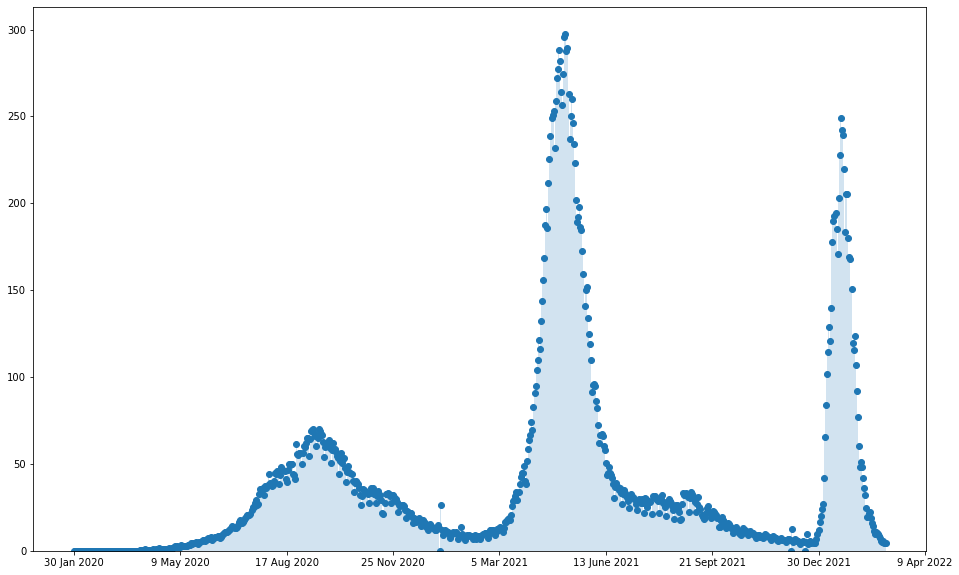

In [13]:
#For analysis and prediction of fourth wave

list_india_per_million = []
for date in df_india['date_numbered']:
    curr_cases = df_india.loc[(df_india["date_numbered"] == date), ['new_cases_per_million']]
    cases = curr_cases['new_cases_per_million'].tolist()
    for case in cases:
        while(case >= 0):
            list_india_per_million.append(int(date))
            case = case - 1
            
fig, ax = plt.subplots(figsize=(16,10))
ax.hist(list_india_per_million, bins=df_india['new_cases_per_million'].size, alpha=0.2)
plt.scatter(df_india['date_numbered'],df_india['new_cases_per_million'])
len(list_india_per_million)

#labels are base date + n*100 days
labels=[-100, '30 Jan 2020', '9 May 2020', '17 Aug 2020', '25 Nov 2020', '5 Mar 2021', '13 June 2021', '21 Sept 2021', '30 Dec 2021', '9 Apr 2022', '19 July 2022']
ax.set_xticklabels(labels)

array_india_per_million = np.array(list_india_per_million).reshape(-1,1)
array_india_per_million.shape

In [14]:
#Original Backup

list_india_per_million_1 = []
for date_1 in df_india_backup['date_numbered']:
    curr_cases_1 = df_india_backup.loc[(df_india_backup["date_numbered"] == date_1), ['new_cases_per_million']]
    cases_1 = curr_cases_1['new_cases_per_million'].tolist()
    for case_1 in cases_1:
        while(case_1 >= 0):
            list_india_per_million_1.append(int(date_1))
            case_1 = case_1 - 1
            
#plt.figure(figsize = (16,10))
#plt.hist(list_india_per_million_1, bins=df_india_backup['new_cases_per_million'].size, alpha=0.2)
#plt.scatter(df_india_backup['date_numbered'],df_india_backup['new_cases_per_million'])
len(list_india_per_million_1)

array_india_per_million_1 = np.array(list_india_per_million_1).reshape(-1,1)
array_india_per_million_1.shape

(31245, 1)

mu1=[240.0639042], mu2=[570.81327178], mu3 = [723.04240392], mu4 = [460.44117463]


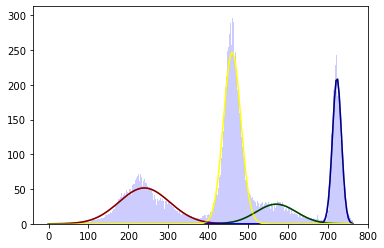

In [15]:
gm = GaussianMixture(n_components=4, random_state=0).fit(array_india_per_million)

india_weights = gm.weights_
india_means = gm.means_
india_covars = gm.covariances_

print(f'mu1={india_means[0]}, mu2={india_means[1]}, mu3 = {india_means[2]}, mu4 = {india_means[3]}')

n, bins, patches = plt.hist(array_india_per_million, df_india['new_cases_per_million'].size, facecolor='blue', alpha=0.2)
x = np.linspace(df_india['date_numbered'].min(),df_india['date_numbered'].max(),200).reshape(200,1)

y1 = array_india_per_million.size*india_weights[0]*stats.norm.pdf(x,india_means[0],np.sqrt(india_covars[0]))
y2 = array_india_per_million.size*india_weights[1]*stats.norm.pdf(x,india_means[1],np.sqrt(india_covars[1]))
y3 = array_india_per_million.size*india_weights[2]*stats.norm.pdf(x,india_means[2],np.sqrt(india_covars[2]))
y4 = array_india_per_million.size*india_weights[3]*stats.norm.pdf(x,india_means[3],np.sqrt(india_covars[3]))

plt.plot(x,y1, c='red')
plt.plot(x,y2, c='green')
plt.plot(x,y3, c='blue')
plt.plot(x,y4, c='yellow')

plt.plot(x, y1+y2+y3, c='black', alpha=0.5)

mu1=[230.6728143], mu2=[478.5830598]


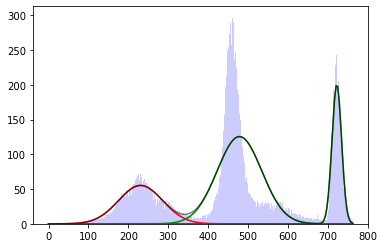

In [16]:
gm = GaussianMixture(n_components=3, random_state=0).fit(array_india_per_million)

india_weights_2 = gm.weights_
india_means_2 = gm.means_
india_covars_2 = gm.covariances_

print(f'mu1={india_means_2[0]}, mu2={india_means_2[1]}')

n, bins, patches = plt.hist(array_india_per_million, df_india['new_cases_per_million'].size, facecolor='blue', alpha=0.2)
x = np.linspace(df_india['date_numbered'].min(),df_india['date_numbered'].max(),200).reshape(200,1)

y1 = array_india_per_million.size*india_weights_2[0]*stats.norm.pdf(x,india_means_2[0],np.sqrt(india_covars_2[0]))
y2 = array_india_per_million.size*india_weights_2[1]*stats.norm.pdf(x,india_means_2[1],np.sqrt(india_covars_2[1]))
y3 = array_india_per_million.size*india_weights_2[2]*stats.norm.pdf(x,india_means_2[2],np.sqrt(india_covars_2[2]))

plt.plot(x,y1, c='red')
plt.plot(x,y2, c='green')
plt.plot(x,y3, c='green')


plt.plot(x, y1+y2+y3, c='black', alpha=0.5)

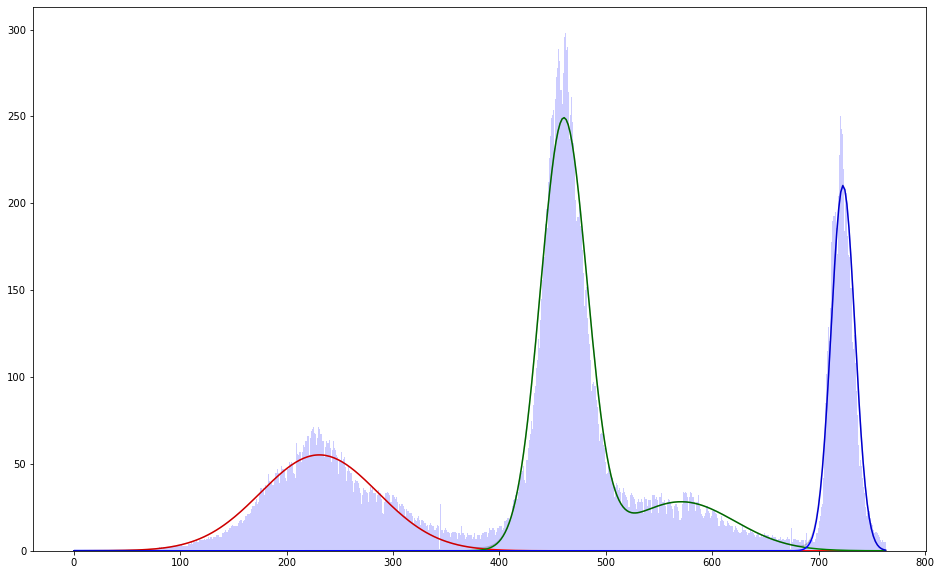

In [17]:
plt.figure(figsize = (16,10))
n, bins, patches = plt.hist(array_india_per_million, df_india['new_cases_per_million'].size, facecolor='blue', alpha=0.2)
x = np.linspace(df_india['date_numbered'].min(),df_india['date_numbered'].max(),400).reshape(400,1)

Y1 = array_india_per_million.size*india_weights_2[0]*stats.norm.pdf(x,india_means_2[0],np.sqrt(india_covars_2[0]))
Y2 = array_india_per_million.size*india_weights[3]*stats.norm.pdf(x,india_means[3],np.sqrt(india_covars[3]))
Y3 = array_india_per_million.size*india_weights[2]*stats.norm.pdf(x,india_means[2],np.sqrt(india_covars[2]))
Yextra = array_india_per_million.size*india_weights[1]*stats.norm.pdf(x,india_means[1],np.sqrt(india_covars[1]))

plt.plot(x,Y1, c='red')
plt.plot(x,Y2 + Yextra, c='green')
plt.plot(x,Y3, c='blue')
plt.plot(x, Y1+Y2+Y3+Yextra, c='black', alpha=0.2)

In [18]:
print('India peaks: ')
ind_m1 = india_means_2[0]
ind_m2 = india_means[3]
ind_m3 = india_means[2]
ind_c1 = india_covars_2[0]
ind_c2 = india_covars[3]
ind_c3 = india_covars[2]
ind_w1 = india_weights_2[0]
ind_w2 = india_weights[3]
ind_w3 = india_weights[2]

print(f'first wave={ind_m1}, second wave={ind_m2}, third wave={ind_m3}')
print(f'sigma1={np.sqrt(ind_c1)}, sigma2={np.sqrt(ind_c2)}, sigma3={np.sqrt(ind_c3)}')
print(f'w1={ind_w1}, w2={ind_w2}, w3={ind_w3}')

India peaks: 
first wave=[230.6728143], second wave=[460.44117463], third wave=[723.04240392]
sigma1=[[55.22251402]], sigma2=[[21.88480376]], sigma3=[[11.23124985]]
w1=0.24455639812905894, w2=0.4332312078098739, w3=0.18941607421414164


# Training Data: Zimbabwe

In [19]:
df_zimbabwe_1 = df_zimbabwe.loc[df_zimbabwe["date_numbered"] <= 240]
df_zimbabwe_2 = df_zimbabwe.loc[df_zimbabwe["date_numbered"] > 240]
df_zimbabwe_2 = df_zimbabwe_2.loc[df_zimbabwe_2["date_numbered"] <= 350]
df_zimbabwe_3 = df_zimbabwe.loc[df_zimbabwe["date_numbered"] > 420]
df_zimbabwe_3 = df_zimbabwe_3.loc[df_zimbabwe_3["date_numbered"] <= 590]
df_zimbabwe_4 = df_zimbabwe.loc[df_zimbabwe["date_numbered"] > 600]
df_zimbabwe_4 = df_zimbabwe_4.loc[df_zimbabwe_4["date_numbered"] <= 700]

(9171, 1)

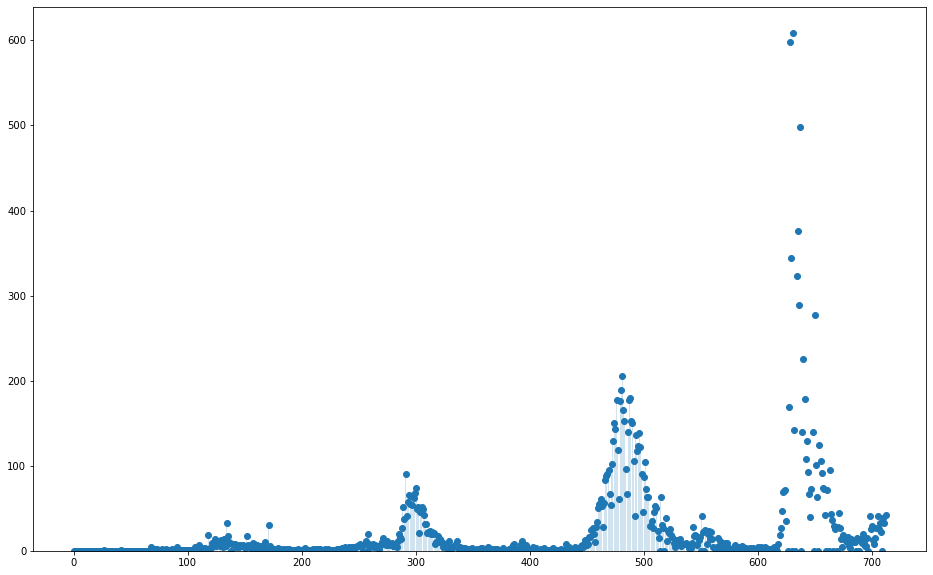

In [20]:
list_zimbabwe_per_million_short = []
for date in df_zimbabwe['date_numbered']:
    if date<=600:
        curr_cases = df_zimbabwe.loc[(df_zimbabwe["date_numbered"] == date), ['new_cases_per_million']]
        cases = curr_cases['new_cases_per_million'].tolist()
        for case in cases:
            while(case >= 0):
                list_zimbabwe_per_million_short.append(date)
                case = case - 1
            
plt.figure(figsize = (16,10))
plt.hist(list_zimbabwe_per_million_short, bins=df_zimbabwe['new_cases_per_million'].size, alpha=0.2)
plt.scatter(df_zimbabwe['date_numbered'],df_zimbabwe['new_cases_per_million'])
len(list_zimbabwe_per_million_short)

array_zimbabwe_per_million_short = np.array(list_zimbabwe_per_million_short).reshape(-1,1)
array_zimbabwe_per_million_short.shape

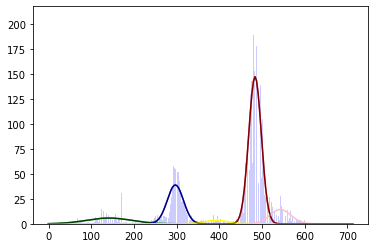

In [21]:
gm = GaussianMixture(n_components=5, random_state=0).fit(array_zimbabwe_per_million_short)

zimbabwe_weights_short = gm.weights_
zimbabwe_means_short = gm.means_
zimbabwe_covars_short = gm.covariances_

n, bins, patches = plt.hist(array_zimbabwe_per_million_short, df_zimbabwe['new_cases_per_million'].size, facecolor='blue', alpha=0.2)
x = np.linspace(df_zimbabwe['date_numbered'].min(),df_zimbabwe['date_numbered'].max(),200).reshape(200,1)

y1 = array_zimbabwe_per_million_short.size*zimbabwe_weights_short[0]*stats.norm.pdf(x,zimbabwe_means_short[0],np.sqrt(zimbabwe_covars_short[0]))
y2 = array_zimbabwe_per_million_short.size*zimbabwe_weights_short[1]*stats.norm.pdf(x,zimbabwe_means_short[1],np.sqrt(zimbabwe_covars_short[1]))
y3 = array_zimbabwe_per_million_short.size*zimbabwe_weights_short[2]*stats.norm.pdf(x,zimbabwe_means_short[2],np.sqrt(zimbabwe_covars_short[2]))
y4 = array_zimbabwe_per_million_short.size*zimbabwe_weights_short[3]*stats.norm.pdf(x,zimbabwe_means_short[3],np.sqrt(zimbabwe_covars_short[3]))
y5 = array_zimbabwe_per_million_short.size*zimbabwe_weights_short[4]*stats.norm.pdf(x,zimbabwe_means_short[4],np.sqrt(zimbabwe_covars_short[4]))

plt.plot(x,y1, c='red')
plt.plot(x,y2, c='green')
plt.plot(x,y3, c='blue')
plt.plot(x,y4, c='yellow')
plt.plot(x,y5, c='pink')

plt.plot(x, y1+y2+y3, c='black', alpha=0.5)

(16146, 1)

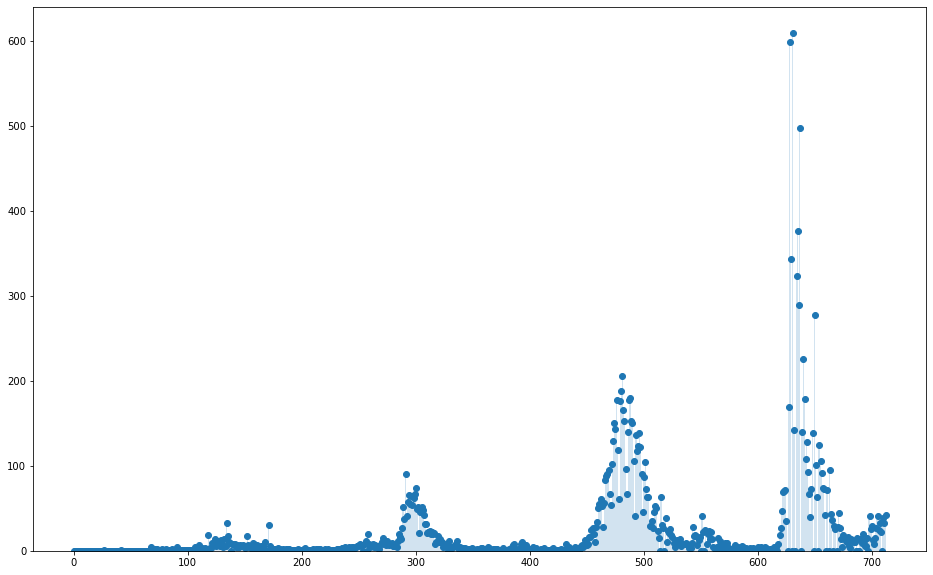

In [22]:
list_zimbabwe_per_million = []
for date in df_zimbabwe['date_numbered']:
    curr_cases = df_zimbabwe.loc[(df_zimbabwe["date_numbered"] == date), ['new_cases_per_million']]
    cases = curr_cases['new_cases_per_million'].tolist()
    for case in cases:
        while(case >= 0):
            list_zimbabwe_per_million.append(date)
            case = case - 1
            
plt.figure(figsize = (16,10))
plt.hist(list_zimbabwe_per_million, bins=df_zimbabwe['new_cases_per_million'].size, alpha=0.2)
plt.scatter(df_zimbabwe['date_numbered'],df_zimbabwe['new_cases_per_million'])
len(list_zimbabwe_per_million)

array_zimbabwe_per_million = np.array(list_zimbabwe_per_million).reshape(-1,1)
array_zimbabwe_per_million.shape

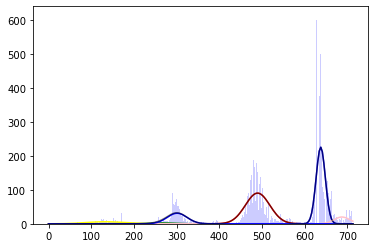

In [23]:
gm = GaussianMixture(n_components=6, random_state=0).fit(array_zimbabwe_per_million)

zimbabwe_weights = gm.weights_
zimbabwe_means = gm.means_
zimbabwe_covars = gm.covariances_
n, bins, patches = plt.hist(array_zimbabwe_per_million, df_zimbabwe['new_cases_per_million'].size, facecolor='blue', alpha=0.2)
x = np.linspace(df_zimbabwe['date_numbered'].min(),df_zimbabwe['date_numbered'].max(),200).reshape(200,1)

y1 = array_zimbabwe_per_million.size*zimbabwe_weights[0]*stats.norm.pdf(x,zimbabwe_means[0],np.sqrt(zimbabwe_covars[0]))
y2 = array_zimbabwe_per_million.size*zimbabwe_weights[1]*stats.norm.pdf(x,zimbabwe_means[1],np.sqrt(zimbabwe_covars[1]))
y3 = array_zimbabwe_per_million.size*zimbabwe_weights[2]*stats.norm.pdf(x,zimbabwe_means[2],np.sqrt(zimbabwe_covars[2]))
y4 = array_zimbabwe_per_million.size*zimbabwe_weights[3]*stats.norm.pdf(x,zimbabwe_means[3],np.sqrt(zimbabwe_covars[3]))
y5 = array_zimbabwe_per_million.size*zimbabwe_weights[4]*stats.norm.pdf(x,zimbabwe_means[4],np.sqrt(zimbabwe_covars[4]))
y6 = array_zimbabwe_per_million.size*zimbabwe_weights[5]*stats.norm.pdf(x,zimbabwe_means[5],np.sqrt(zimbabwe_covars[5]))

plt.plot(x,y1, c='red')
plt.plot(x,y2, c='green')
plt.plot(x,y3, c='blue')
plt.plot(x,y4, c='yellow')
plt.plot(x,y5, c='pink')
plt.plot(x,y6, c='blue')


plt.plot(x, y1+y2+y3+y6, c='black', alpha=0.5)

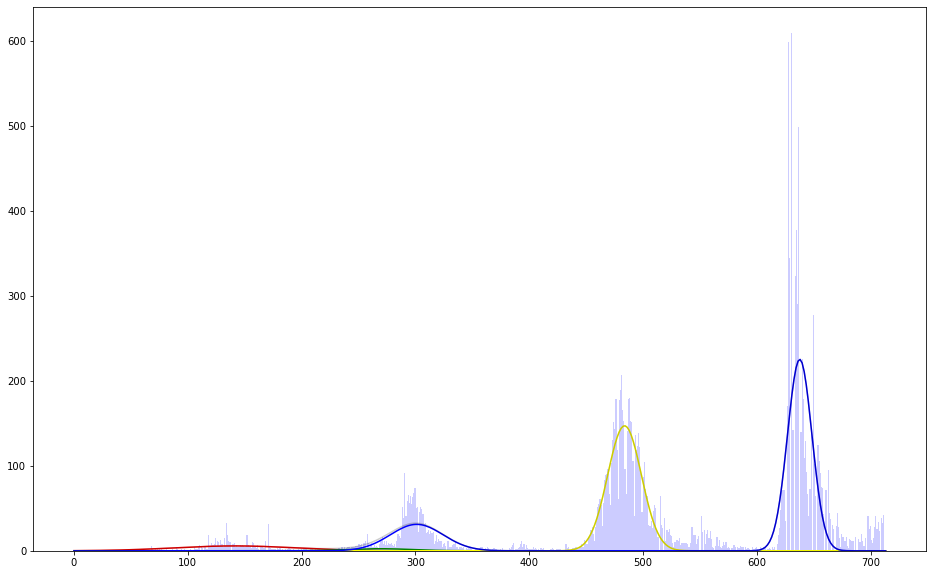

In [24]:
plt.figure(figsize = (16,10))
n, bins, patches = plt .hist(array_zimbabwe_per_million, df_zimbabwe['new_cases_per_million'].size, facecolor='blue', alpha=0.2)
x = np.linspace(df_zimbabwe['date_numbered'].min(),df_zimbabwe['date_numbered'].max(),400).reshape(400,1)

Y1 = array_zimbabwe_per_million_short.size*zimbabwe_weights_short[1]*stats.norm.pdf(x,zimbabwe_means_short[1],np.sqrt(zimbabwe_covars_short[1]))
Y2 = array_zimbabwe_per_million.size*zimbabwe_weights[1]*stats.norm.pdf(x,zimbabwe_means[1],np.sqrt(zimbabwe_covars[1]))
Y3 = array_zimbabwe_per_million_short.size*zimbabwe_weights_short[0]*stats.norm.pdf(x,zimbabwe_means_short[0],np.sqrt(zimbabwe_covars_short[0]))
Y4 = array_zimbabwe_per_million.size*zimbabwe_weights[2]*stats.norm.pdf(x,zimbabwe_means[2],np.sqrt(zimbabwe_covars[2]))
Yextra = array_zimbabwe_per_million.size*zimbabwe_weights[5]*stats.norm.pdf(x,zimbabwe_means[5],np.sqrt(zimbabwe_covars[5]))

plt.plot(x,Y1, c='red')
plt.plot(x,Y2, c='green')
plt.plot(x,Y3, c='yellow')
plt.plot(x,Y4+Yextra, c='blue')

plt.plot(x, Y1+Y2+Y3+Y4+Yextra, c='black', alpha=0.2)

## Prediction of India's fourth wave based on ZIMBABWE:

In [25]:
print('Zimbabwe peaks: ')
zimbabwe_m1 = zimbabwe_means_short[1]
zimbabwe_m2 = zimbabwe_means[1]
zimbabwe_m3 = zimbabwe_means_short[0]
zimbabwe_m4 = zimbabwe_means[2]
zimbabwe_c1 = zimbabwe_covars_short[1]
zimbabwe_c2 = zimbabwe_covars[1]
zimbabwe_c3 = zimbabwe_covars_short[0]
zimbabwe_c4 = zimbabwe_covars[2]
zimbabwe_w1 = zimbabwe_weights_short[1]
zimbabwe_w2 = zimbabwe_weights[1]
zimbabwe_w3 = zimbabwe_weights_short[0]
zimbabwe_w4 = zimbabwe_weights[2]

print(f'first wave={zimbabwe_m1}, second wave={zimbabwe_m2}, third wave = {zimbabwe_m3}, fourth wave = {zimbabwe_m4}')
print(f'sigma1={np.sqrt(zimbabwe_c1)}, sigma2={np.sqrt(zimbabwe_c2)}, sigma3={np.sqrt(zimbabwe_c3)}, sigma4={np.sqrt(zimbabwe_c4)}')
print(f'w1={zimbabwe_w1}, w2={zimbabwe_w2}, w3={zimbabwe_w3}, w4={zimbabwe_w4}')

Zimbabwe peaks: 
first wave=[141.3944584], second wave=[268.61667276], third wave = [483.72183391], fourth wave = [637.61480149]
sigma1=[[52.69722252]], sigma2=[[29.27561051]], sigma3=[[14.79975882]], sigma4=[[10.73691413]]
w1=0.08270014927774753, w2=0.011101780713195338, w3=0.594970776868806, w4=0.3754034631794961


In [26]:
#India fourth wave:
zimbabwe_ind_m4 = ind_m3 + ((ind_m3-ind_m2)*(zimbabwe_m4-zimbabwe_m3)/(zimbabwe_m3-zimbabwe_m2))
zimbabwe_ind_c4 = ind_c3 + ((ind_c3-ind_c2)*(zimbabwe_c4-zimbabwe_c3)/(zimbabwe_c3-zimbabwe_c2))
zimbabwe_ind_w4 = 1 - (ind_w1+ind_w2+ind_w3)

print(zimbabwe_ind_m4, zimbabwe_ind_c4, zimbabwe_ind_w4)

[910.91554583] [[68.77061838]] 0.13279631984692553


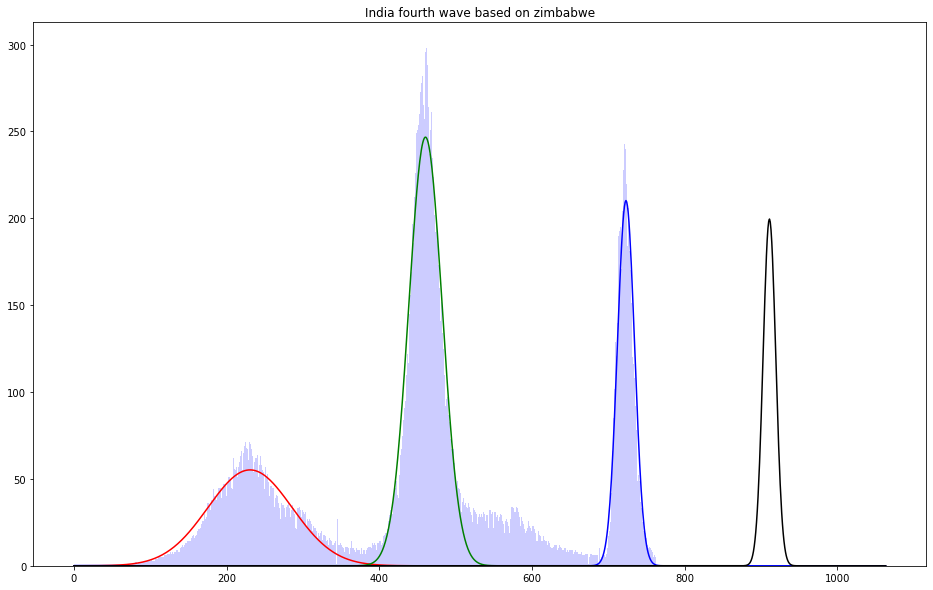

In [27]:
fig, ax = plt.subplots(figsize=(16,10))
n, bins, patches = plt.hist(array_india_per_million, df_india['new_cases_per_million'].size, facecolor='blue', alpha=0.2)
x = np.linspace(df_india['date_numbered'].min(),df_india['date_numbered'].max()+300,301+df_india['date_numbered'].max()-df_india['date_numbered'].min()).reshape(301+df_india['date_numbered'].max()-df_india['date_numbered'].min(),1)

plt.title("India fourth wave based on zimbabwe")
plt.plot(x,array_india_per_million.size*ind_w1*stats.norm.pdf(x,ind_m1,np.sqrt(ind_c1)), c='red')
plt.plot(x,array_india_per_million.size*ind_w2*stats.norm.pdf(x,ind_m2,np.sqrt(ind_c2)), c='green')
plt.plot(x,array_india_per_million.size*ind_w3*stats.norm.pdf(x,ind_m3,np.sqrt(ind_c3)), c='blue')
plt.plot(x,array_india_per_million.size*zimbabwe_ind_w4*stats.norm.pdf(x,zimbabwe_ind_m4,np.sqrt(zimbabwe_ind_c4)), c='black')

In [28]:
array_india_per_million_backup = array_india_per_million
array_india_per_million.shape

(31245, 1)

In [29]:
for date in x:
    if date > max(list_india_per_million):
        today_cases = math.floor(array_india_per_million.size*zimbabwe_ind_w4*stats.norm.pdf(date,zimbabwe_ind_m4,np.sqrt(zimbabwe_ind_c4)))
        while today_cases > 0:
            list_india_per_million.append(int(date))
            today_cases = today_cases - 1

In [30]:
array_india_per_million = np.array(list_india_per_million).reshape(-1,1)
array_india_per_million.shape

(35363, 1)

In [31]:
ind_w1_new = array_india_per_million_backup.size*ind_w1/array_india_per_million.size
ind_w2_new = array_india_per_million_backup.size*ind_w2/array_india_per_million.size
ind_w3_new = array_india_per_million_backup.size*ind_w3/array_india_per_million.size
ind_w_extra = array_india_per_million_backup.size*india_weights[1]/array_india_per_million.size
ind_w4_new = 1 - (ind_w1_new + ind_w2_new + ind_w3_new)
print(ind_w4_new)

0.23378166483661422


[Text(-200.0, 0, '30 Jan 2020'),
 Text(0.0, 0, '9 May 2020'),
 Text(200.0, 0, '17 Aug 2020'),
 Text(400.0, 0, '25 Nov 2020'),
 Text(600.0, 0, '5 Mar 2021'),
 Text(800.0, 0, '13 June 2021'),
 Text(1000.0, 0, '21 Sept 2021'),
 Text(1200.0, 0, '30 Dec 2021'),
 Text(0, 0, '9 Apr 2022'),
 Text(0, 0, '19 July 2022'),
 Text(0, 0, '27 Oct 2022'),
 Text(0, 0, '4 Feb 2023')]

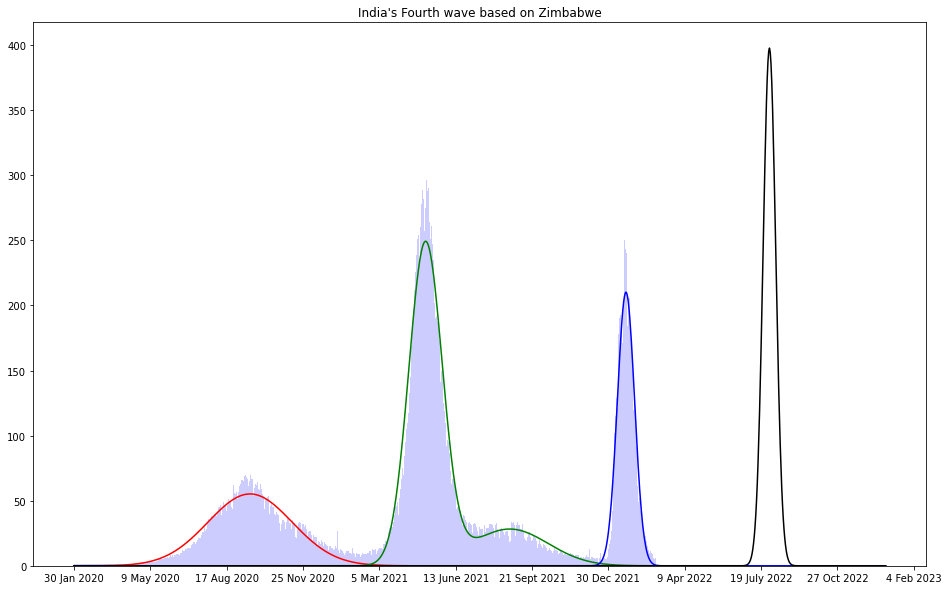

In [32]:
fig, ax = plt.subplots(figsize=(16,10))
n, bins, patches = plt.hist(array_india_per_million_1, int(max(array_india_per_million_1)), facecolor='blue', alpha=0.2)
x = np.linspace(df_india['date_numbered'].min(),df_india['date_numbered'].max()+300,301+df_india['date_numbered'].max()-df_india['date_numbered'].min()).reshape(301+df_india['date_numbered'].max()-df_india['date_numbered'].min(),1)

y1 = array_india_per_million.size*ind_w1_new*stats.norm.pdf(x,ind_m1,np.sqrt(ind_c1))
y2 = array_india_per_million.size*ind_w2_new*stats.norm.pdf(x,ind_m2,np.sqrt(ind_c2))
y3 = array_india_per_million.size*ind_w3_new*stats.norm.pdf(x,ind_m3,np.sqrt(ind_c3))
yextra = array_india_per_million.size*ind_w_extra*stats.norm.pdf(x,india_means[1],np.sqrt(india_covars[1]))

plt.title("India's Fourth wave based on Zimbabwe")
plt.plot(x,y1, c='red')
plt.plot(x,y2+yextra, c='green')
plt.plot(x, y3, c='blue')
plt.plot(x,array_india_per_million.size*ind_w4_new*stats.norm.pdf(x,zimbabwe_ind_m4,np.sqrt(zimbabwe_ind_c4)), c='black')
fig.canvas.draw()
labels = [item.get_text() for item in ax.get_xticklabels()]

#labels are base date + n*100 days
ax.xaxis.set_ticks([0,100,200,300,400,500,600, 700,800,900,1000,1100])
labels=['30 Jan 2020', '9 May 2020', '17 Aug 2020', '25 Nov 2020', '5 Mar 2021', '13 June 2021', '21 Sept 2021', '30 Dec 2021', '9 Apr 2022', '19 July 2022', '27 Oct 2022', '4 Feb 2023']
ax.set_xticklabels(labels)

#labels are base date + n*200 days
#labels=[-200, '30 Jan 2020', '17 Aug 2020', '5 Mar 2021', '21 Sept 2021', '9 Apr 2022', '26 Oct 2022', '14 May 2022']
#ax.set_xticklabels(labels)

In [33]:
(unique, counts) = np.unique(array_india_per_million, return_counts=True)

In [34]:
df = pd.DataFrame(unique,counts)

In [35]:
#For checking
df.to_excel("dataframe check fourth wave dates.xlsx")

In [36]:
"""
Dates for Fourth wave
start: 874 = 22 June 2022
peak: 936 = 23 August 2022
end: 998 = 24 October 2022
"""

'\nDates for Fourth wave\nstart: 874 = 22 June 2022\npeak: 936 = 23 August 2022\nend: 998 = 24 October 2022\n'

(8096, 1)

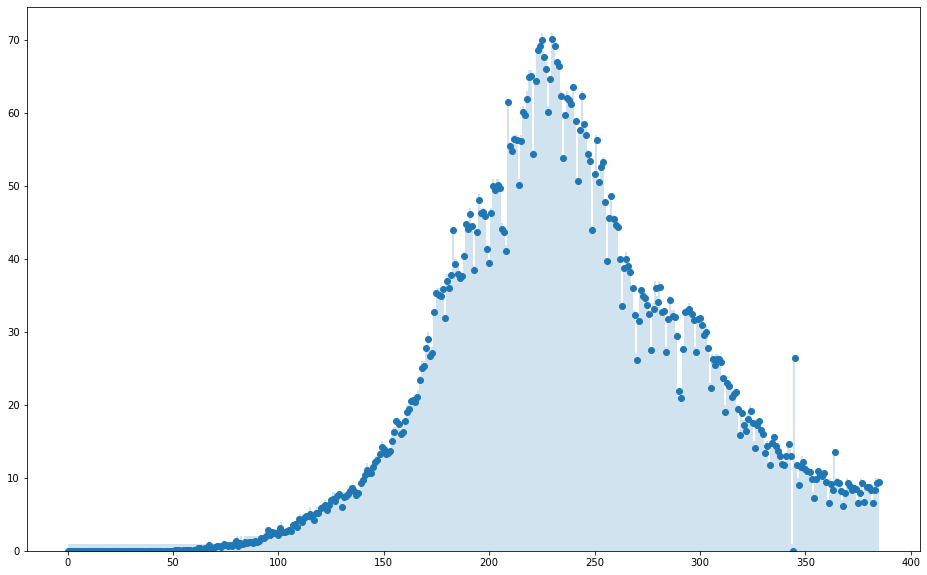

In [37]:
list_india_per_million_wave1 = []
for date in df_india_1['date_numbered']:
    curr_cases = df_india_1.loc[(df_india_1["date_numbered"] == date), ['new_cases_per_million']]
    cases = curr_cases['new_cases_per_million'].tolist()
    for case in cases:
        while(case >= 0 and case <= 385):
            list_india_per_million_wave1.append(int(date))
            case = case - 1
            
plt.figure(figsize = (16,10))
plt.hist(list_india_per_million_wave1, bins=df_india_1['new_cases_per_million'].size, alpha=0.2)
plt.scatter(df_india_1['date_numbered'],df_india_1['new_cases_per_million'])
len(list_india_per_million_wave1)

array_india_per_million_wave1 = np.array(list_india_per_million_wave1).reshape(-1,1)
array_india_per_million_wave1.shape

In [38]:
def draw_bs_replicates(data,func,size):
    """creates a bootstrap sample, computes replicates and returns replicates array"""
    # Create an empty array to store replicates
    bs_replicates = np.empty(size)
    
    # Create bootstrap replicates as much as size
    for i in range(size):
        # Create a bootstrap sample
        bs_sample = np.random.choice(data,size=len(data))
        # Get bootstrap replicate and append to bs_replicates
        bs_replicates[i] = func(bs_sample)
    
    return bs_replicates

In [39]:
bs_replicates_heights_india_1 = draw_bs_replicates(list_india_per_million_wave1,np.mean,15000)

# Print the mean of bootstrap replicates
print("Bootstrap replicates mean: " + str(np.mean(bs_replicates_heights_india_1)))

Bootstrap replicates mean: 237.4912843050066


In [40]:
conf_interval_india_1 = np.percentile(bs_replicates_heights_india_1,[1,99])

# Print the interval
print("The confidence interval: ",conf_interval_india_1)

The confidence interval:  [235.89438241 239.06030385]


(14980, 1)

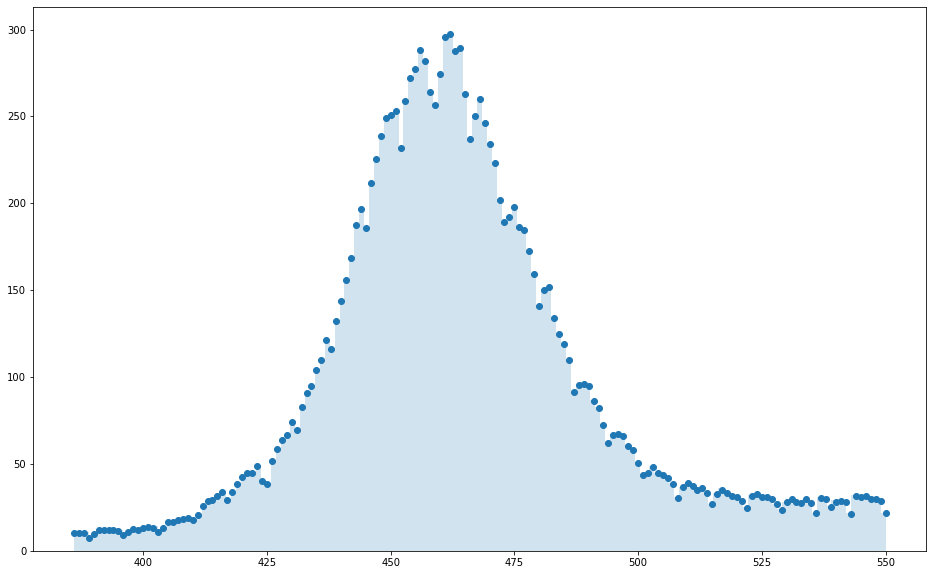

In [41]:
list_india_per_million_wave2 = []
for date in df_india_2['date_numbered']:
    curr_cases = df_india_2.loc[(df_india_2["date_numbered"] == date), ['new_cases_per_million']]
    cases = curr_cases['new_cases_per_million'].tolist()
    for case in cases:
        while(case >= 0 and case <= 385):
            list_india_per_million_wave2.append(int(date))
            case = case - 1
            
plt.figure(figsize = (16,10))
plt.hist(list_india_per_million_wave2, bins=df_india_2['new_cases_per_million'].size, alpha=0.2)
plt.scatter(df_india_2['date_numbered'],df_india_2['new_cases_per_million'])
len(list_india_per_million_wave2)

array_india_per_million_wave2 = np.array(list_india_per_million_wave2).reshape(-1,1)
array_india_per_million_wave2.shape

In [42]:
bs_replicates_heights_india_2 = draw_bs_replicates(list_india_per_million_wave2,np.mean,15000)

# Print the mean of bootstrap replicates
print("Bootstrap replicates mean: " + str(np.mean(bs_replicates_heights_india_2)))

Bootstrap replicates mean: 465.24360206497556


In [43]:
conf_interval_india_2 = np.percentile(bs_replicates_heights_india_2,[1,99])

# Print the interval
print("The confidence interval: ",conf_interval_india_2)

The confidence interval:  [464.69819693 465.78311081]


(5977, 1)

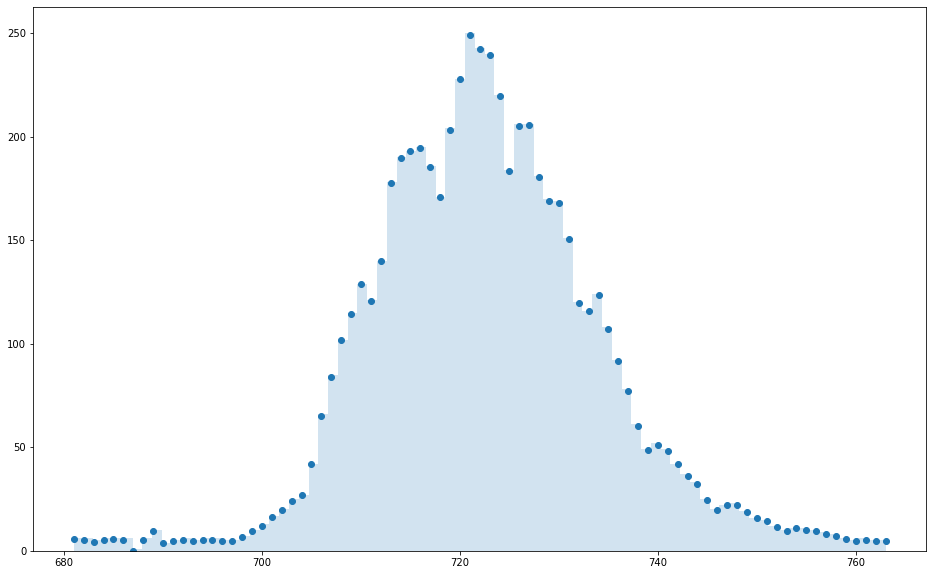

In [44]:
list_india_per_million_wave3 = []
for date in df_india_3['date_numbered']:
    curr_cases = df_india_3.loc[(df_india_3["date_numbered"] == date), ['new_cases_per_million']]
    cases = curr_cases['new_cases_per_million'].tolist()
    for case in cases:
        while(case >= 0 and case <= 385):
            list_india_per_million_wave3.append(int(date))
            case = case - 1
            
plt.figure(figsize = (16,10))
plt.hist(list_india_per_million_wave3, bins=df_india_3['new_cases_per_million'].size, alpha=0.2)
plt.scatter(df_india_3['date_numbered'],df_india_3['new_cases_per_million'])
len(list_india_per_million_wave3)

array_india_per_million_wave3 = np.array(list_india_per_million_wave3).reshape(-1,1)
array_india_per_million_wave3.shape

In [45]:
bs_replicates_heights_india_3 = draw_bs_replicates(list_india_per_million_wave3,np.mean,15000)

# Print the mean of bootstrap replicates
print("Bootstrap replicates mean: " + str(np.mean(bs_replicates_heights_india_3)))

Bootstrap replicates mean: 722.7627955830685


In [46]:
conf_interval_india_3 = np.percentile(bs_replicates_heights_india_3,[1,99])

# Print the interval
print("The confidence interval: ",conf_interval_india_3)

The confidence interval:  [722.41392003 723.10473649]


(1873, 1)

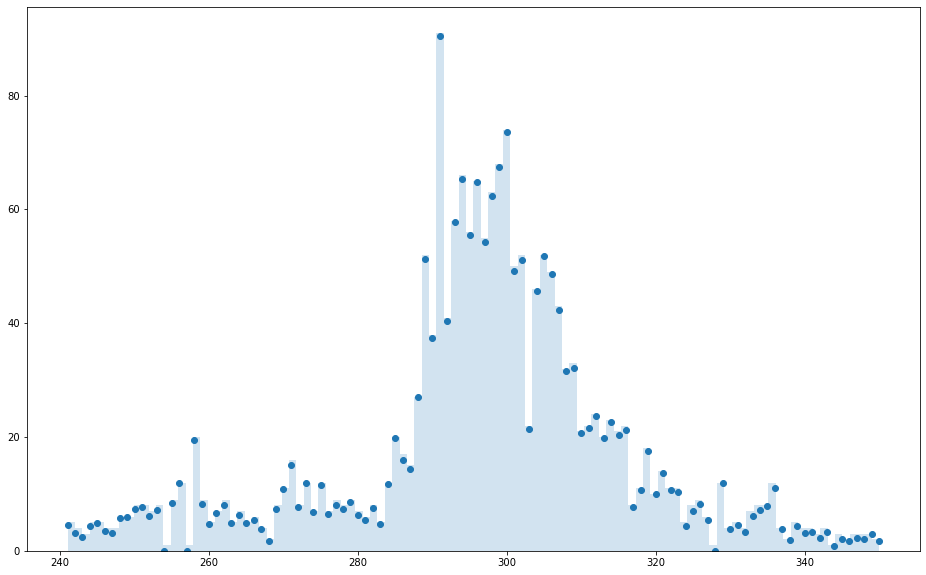

In [47]:
list_zimbabwe_per_million_wave2 = []
for date in df_zimbabwe_2['date_numbered']:
    curr_cases = df_zimbabwe_2.loc[(df_zimbabwe_2["date_numbered"] == date), ['new_cases_per_million']]
    cases = curr_cases['new_cases_per_million'].tolist()
    for case in cases:
        while(case >= 0 and case <= 385):
            list_zimbabwe_per_million_wave2.append(int(date))
            case = case - 1
            
plt.figure(figsize = (16,10))
plt.hist(list_zimbabwe_per_million_wave2, bins=df_zimbabwe_2['new_cases_per_million'].size, alpha=0.2)
plt.scatter(df_zimbabwe_2['date_numbered'],df_zimbabwe_2['new_cases_per_million'])
len(list_zimbabwe_per_million_wave2)

array_zimbabwe_per_million_wave2 = np.array(list_zimbabwe_per_million_wave2).reshape(-1,1)
array_zimbabwe_per_million_wave2.shape

In [48]:
bs_replicates_heights_zimbabwe_2 = draw_bs_replicates(list_zimbabwe_per_million_wave2,np.mean,15000)

# Print the mean of bootstrap replicates
print("Bootstrap replicates mean: " + str(np.mean(bs_replicates_heights_zimbabwe_2)))

Bootstrap replicates mean: 296.69662968499733


In [49]:
conf_interval_zimbabwe_2 = np.percentile(bs_replicates_heights_zimbabwe_2,[1,99])

# Print the interval
print("The confidence interval: ",conf_interval_zimbabwe_2)

The confidence interval:  [295.65669514 297.7213134 ]


(6351, 1)

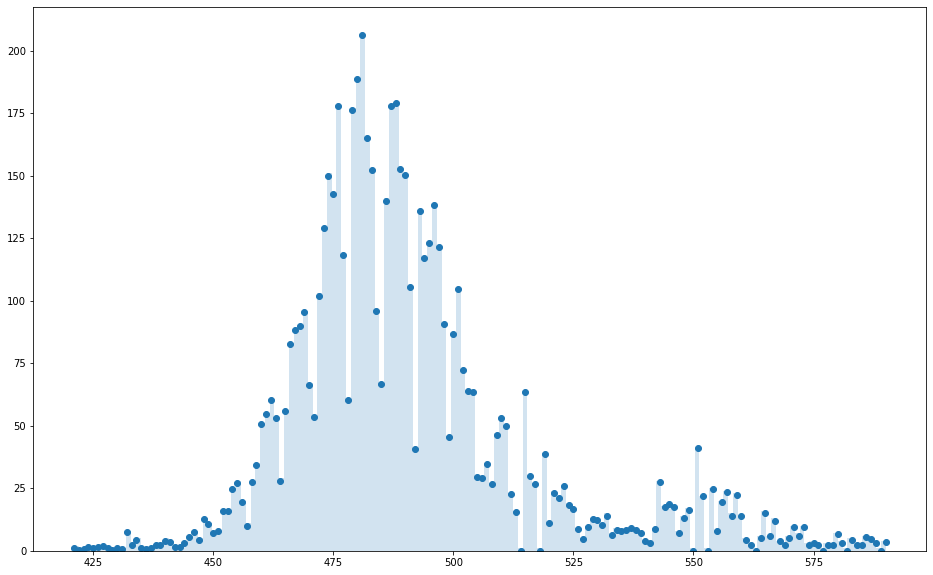

In [50]:
list_zimbabwe_per_million_wave3 = []
for date in df_zimbabwe_3['date_numbered']:
    curr_cases = df_zimbabwe_3.loc[(df_zimbabwe_3["date_numbered"] == date), ['new_cases_per_million']]
    cases = curr_cases['new_cases_per_million'].tolist()
    for case in cases:
        while(case >= 0 and case <= 385):
            list_zimbabwe_per_million_wave3.append(int(date))
            case = case - 1
            
plt.figure(figsize = (16,10))
plt.hist(list_zimbabwe_per_million_wave3, bins=df_zimbabwe_3['new_cases_per_million'].size, alpha=0.2)
plt.scatter(df_zimbabwe_3['date_numbered'],df_zimbabwe_3['new_cases_per_million'])
len(list_zimbabwe_per_million_wave3)

array_zimbabwe_per_million_wave3 = np.array(list_zimbabwe_per_million_wave3).reshape(-1,1)
array_zimbabwe_per_million_wave3.shape

In [51]:
bs_replicates_heights_zimbabwe_3 = draw_bs_replicates(list_zimbabwe_per_million_wave3,np.mean,15000)

# Print the mean of bootstrap replicates
print("Bootstrap replicates mean: " + str(np.mean(bs_replicates_heights_zimbabwe_3)))

Bootstrap replicates mean: 491.1093548102661


In [52]:
conf_interval_zimbabwe_3 = np.percentile(bs_replicates_heights_zimbabwe_3,[1,99])

# Print the interval
print("The confidence interval: ",conf_interval_zimbabwe_3)

The confidence interval:  [490.35757676 491.86664147]


(4965, 1)

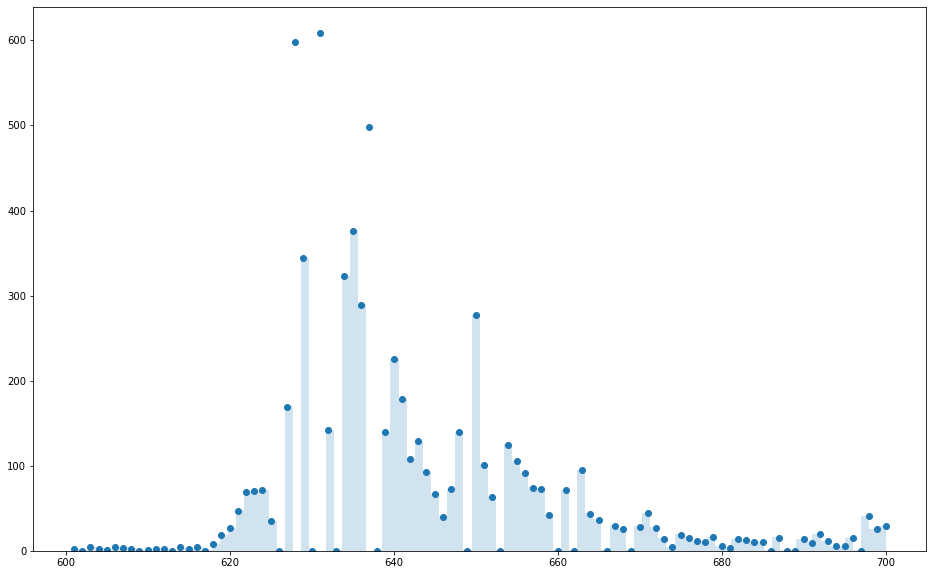

In [53]:
list_zimbabwe_per_million_wave4 = []
for date in df_zimbabwe_4['date_numbered']:
    curr_cases = df_zimbabwe_4.loc[(df_zimbabwe_4["date_numbered"] == date), ['new_cases_per_million']]
    cases = curr_cases['new_cases_per_million'].tolist()
    for case in cases:
        while(case >= 0 and case <= 385):
            list_zimbabwe_per_million_wave4.append(int(date))
            case = case - 1
            
plt.figure(figsize = (16,10))
plt.hist(list_zimbabwe_per_million_wave4, bins=df_zimbabwe_4['new_cases_per_million'].size, alpha=0.2)
plt.scatter(df_zimbabwe_4['date_numbered'],df_zimbabwe_4['new_cases_per_million'])
len(list_zimbabwe_per_million_wave4)

array_zimbabwe_per_million_wave4 = np.array(list_zimbabwe_per_million_wave4).reshape(-1,1)
array_zimbabwe_per_million_wave4.shape

In [54]:
bs_replicates_heights_zimbabwe_4 = draw_bs_replicates(list_zimbabwe_per_million_wave4,np.mean,15000)

# Print the mean of bootstrap replicates
print("Bootstrap replicates mean: " + str(np.mean(bs_replicates_heights_zimbabwe_4)))

Bootstrap replicates mean: 644.790174394092


In [55]:
conf_interval_zimbabwe_4 = np.percentile(bs_replicates_heights_zimbabwe_4,[1,99])

# Print the interval
print("The confidence interval: ",conf_interval_zimbabwe_4)

The confidence interval:  [644.23101309 645.34884995]


In [56]:
##### Confidence Intervals for fourth wave
ci_range = []
for india_m3 in range(int(conf_interval_india_3[0])-1, int(conf_interval_india_3[1])+1):
    for india_m2 in range(int(conf_interval_india_2[0])-1, int(conf_interval_india_2[1])+1):
        for zimbabwe_m4 in range(int(conf_interval_zimbabwe_4[0])-1, int(conf_interval_zimbabwe_4[1])+1):
            for zimbabwe_m3 in range(int(conf_interval_zimbabwe_3[0])-1, int(conf_interval_zimbabwe_3[1])+1):
                for zimbabwe_m2 in range(int(conf_interval_zimbabwe_2[0])-1, int(conf_interval_zimbabwe_2[1])+1):
                    ci_value = india_m3 + ((india_m3-india_m2)*(zimbabwe_m4-zimbabwe_m3)/(zimbabwe_m3-zimbabwe_m2))
                    ci_range.append(ci_value)
        
conf_int = (int(zimbabwe_ind_m4 - (max(ci_range) - min(ci_range))/2), int(zimbabwe_ind_m4 + (max(ci_range) - min(ci_range))/2)+1)
print(conf_int)

(903, 919)


In [57]:
"""
99% Confidence Interval: (16 Days)
928 = 15 August 2022
936 = 23 August 2022
944 = 31 August 2022
"""

'\n99% Confidence Interval: (16 Days)\n928 = 15 August 2022\n936 = 23 August 2022\n944 = 31 August 2022\n'

In [58]:
# Dates for Fourth wave
start4 = 874
peak4 = 936
end4 = 998

conf_int_start = (int(start4 - (max(ci_range) - min(ci_range))/2), int(start4 + (max(ci_range) - min(ci_range))/2)+1)
print(conf_int_start)

conf_int_end = (int(end4 - (max(ci_range) - min(ci_range))/2), int(end4 + (max(ci_range) - min(ci_range))/2)+1)
print(conf_int_end)

(866, 882)
(990, 1006)
